<a href="https://colab.research.google.com/github/khljgkjpp52/ai_tf_detection/blob/QA05/cloab/1pi_Project_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EndGame_50classes(TM的模型) -> accuracy: 0.772 [cunfusion matrix](https://drive.google.com/file/d/1ZrSswL6r2_l2a_9J5nWgukhH6lC0znG6/view?usp=share_link)

#### 資料分布不均
* 50 classes_original -> **accuracy: 0.036** [cunfusion matrix](https://drive.google.com/file/d/1nKzJ6HadIc2UHKL97wA94MO_geFTxCHV/view?usp=share_link)

#### 經過Data Augmentation後，先用5classes做測試
* 5 classes -> **accuracy: 0.16** [cunfusion matrix](https://drive.google.com/file/d/1WY282pJqSIH65fY1PXTpGXe050nbWWqH/view?usp=share_link)
* pixel 448x448 -> **accuracy: 0.2** [cunfusion matrix](https://drive.google.com/file/d/1AwYlqJNii-xjm083OCS3WRFsiFkKBV_s/view?usp=share_link)
* 新增garbage class -> **accuracy: 0.16** [cunfusion matrix](https://drive.google.com/file/d/1RbapsQz3F4nCb-UNIajU4N2kBvg4xaNs/view?usp=share_link)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [3]:
os.chdir('/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/') #切換該目錄
NUM_OF_CLASS = len(os.listdir())
print(NUM_OF_CLASS)
print(os.listdir()) #確認目錄內容


50
['Endgame_2463', 'Endgame_2462', 'Endgame_2457', 'Endgame_2464', 'Endgame_2465', 'Endgame_2461', 'Endgame_2459', 'Endgame_2460', 'Endgame_2458', 'Endgame_2466', 'Endgame_2467', 'Endgame_2473', 'Endgame_2474', 'Endgame_2472', 'Endgame_2469', 'Endgame_2476', 'Endgame_2475', 'Endgame_2470', 'Endgame_2468', 'Endgame_2471', 'Endgame_2481', 'Endgame_2478', 'Endgame_2485', 'Endgame_2480', 'Endgame_2484', 'Endgame_2483', 'Endgame_2477', 'Endgame_2486', 'Endgame_2482', 'Endgame_2479', 'Endgame_2487', 'Endgame_2493', 'Endgame_2491', 'Endgame_2494', 'Endgame_2489', 'Endgame_2488', 'Endgame_2492', 'Endgame_2496', 'Endgame_2490', 'Endgame_2495', 'Endgame_2498', 'Endgame_2497', 'Endgame_2504', 'Endgame_2503', 'Endgame_2500', 'Endgame_2502', 'Endgame_2501', 'Endgame_2499', 'Endgame_2506', 'Endgame_2505']


In [11]:

batch_size = 9 #@param # 像素在大的話就不適合繼續用太低 
img_height = 224 #@param 
img_width = 224 #@param 
data_dir = os.getcwd() 

In [27]:
# tf.keras.preprocessing.image_dataset_from_directory
preds_train = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.2, ##################
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3750 files belonging to 50 classes.
Using 3000 files for training.


In [37]:
#@title # 資料讀取 測試
import glob

dir = "/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/*"
X_train = []
y_train = []
for dir_path in glob.glob(dir):
    print(dir_path)
    continue
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_train.append(img)
        y_train.append(img_label)
        
X_train=np.array(X_train)
y_train=np.array(y_train)

/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2463
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2462
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2457
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2464
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2465
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2461
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2459
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2460
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2458
/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes/Endgame_2466


In [28]:
# 小撇步 -> training資料不切割，直接拿測試資料當驗證，快速查看結果
# https://ithelp.ithome.com.tw/articles/10262751
ds_train = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.2, ##################
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

ds_test = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(len(ds_train.class_names))
print(ds_train.class_names)

Found 3750 files belonging to 50 classes.
Using 3000 files for training.
Found 3750 files belonging to 50 classes.
Using 750 files for validation.
50
['Endgame_2457', 'Endgame_2458', 'Endgame_2459', 'Endgame_2460', 'Endgame_2461', 'Endgame_2462', 'Endgame_2463', 'Endgame_2464', 'Endgame_2465', 'Endgame_2466', 'Endgame_2467', 'Endgame_2468', 'Endgame_2469', 'Endgame_2470', 'Endgame_2471', 'Endgame_2472', 'Endgame_2473', 'Endgame_2474', 'Endgame_2475', 'Endgame_2476', 'Endgame_2477', 'Endgame_2478', 'Endgame_2479', 'Endgame_2480', 'Endgame_2481', 'Endgame_2482', 'Endgame_2483', 'Endgame_2484', 'Endgame_2485', 'Endgame_2486', 'Endgame_2487', 'Endgame_2488', 'Endgame_2489', 'Endgame_2490', 'Endgame_2491', 'Endgame_2492', 'Endgame_2493', 'Endgame_2494', 'Endgame_2495', 'Endgame_2496', 'Endgame_2497', 'Endgame_2498', 'Endgame_2499', 'Endgame_2500', 'Endgame_2501', 'Endgame_2502', 'Endgame_2503', 'Endgame_2504', 'Endgame_2505', 'Endgame_2506']


In [ ]:
base = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights="imagenet",
    # weights=None,
    # classifier_activation='softmax'
    )
base.trainable = False
net = tf.keras.layers.GlobalAveragePooling2D()(base.output)
net = tf.keras.layers.Dense(NUM_OF_CLASS, activation='softmax')(net)

model = tf.keras.Model(inputs=[base.input], outputs=[net])
# model.summary() # 156層

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, LearningRateScheduler

LR = 0.01  # 加0補0測試
EPOCHS = 50

c = [
    ModelCheckpoint(f"/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/weights/5classes70_{EPOCHS}_{batch_size}_{img_height}.h5", save_best_only=True),
    ModelCheckpoint(f"/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/weights/5classes70_{EPOCHS}_{batch_size}_{img_height}.h5", save_best_only=False),
    EarlyStopping(patience=10, restore_best_weights=True)
]

model.load_weights(f"/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/weights/5classes_{EPOCHS}_{batch_size}_{img_height}.h5")
model.compile(
    optimizer=tf.keras.optimizers.Adam(LR), # 先用adam看看
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 警告訊息叫我from_logits設置False
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=EPOCHS,
    validation_data=ds_test,
    verbose=True,
    callbacks=c)

# model.save(f"/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/weights/selfweights_{EPOCHS}_{batch_size}_{img_height}.h5")

In [ ]:
model.evaluate(ds_test, verbose=True)

5/5 [==============================] - 1s 28ms/step - loss: 0.0797 - sparse_categorical_accuracy: 0.9857


[0.07966171205043793, 0.9857142567634583]

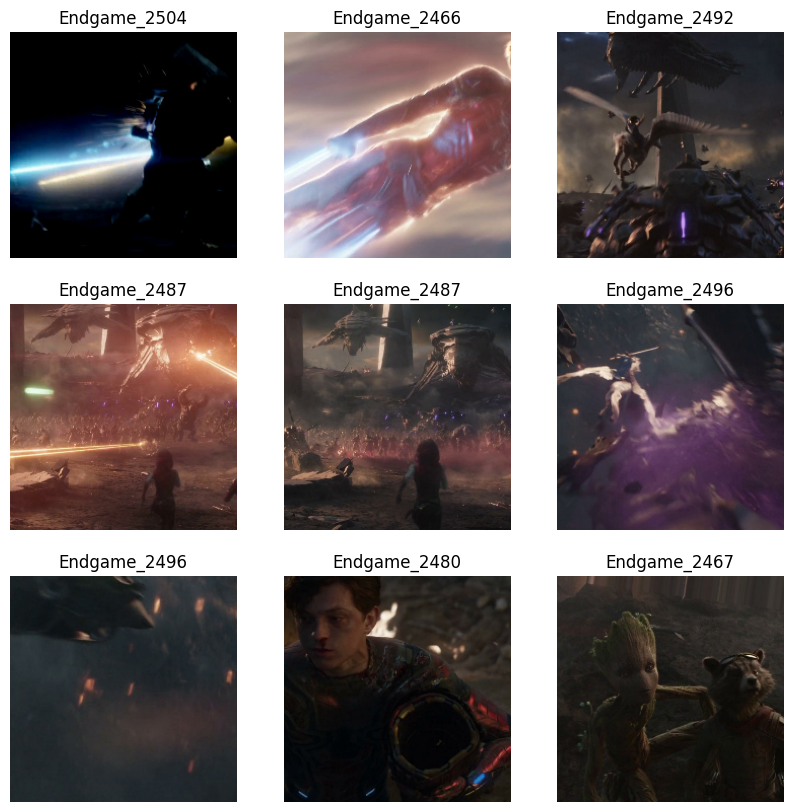

In [29]:
#@title plt.subplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  lbl=labels.numpy()
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ds_train.class_names[lbl[i]])
    plt.axis("off")

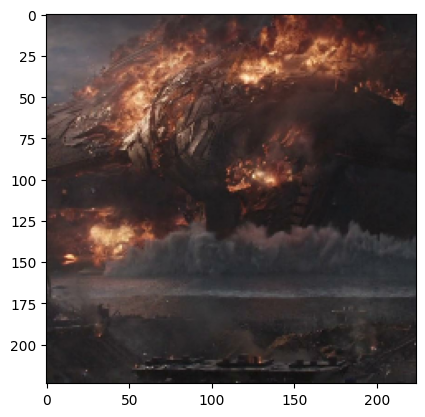

In [ ]:
#@title cv2_imshow
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
plt.imshow(images[1].numpy().astype("uint8"))




In [ ]:
#@title test_base.summary()
# 用舊的tf 2.4.4
# python3.6~3.8
# 印summary看一下

test_base = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=True, weights='imagenet')
test_base.summary()

14536120/14536120 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

In [5]:
# 載入模型與創建labels
# from keras.models import load_model  
# model = load_model("/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/50_class_crop_224v1.h5")

# # ----------50classes 用的----------
# classes = []
# start = 2457
# end = 2506
# for c in range(start, end+1):
#     classes.append(f"Endgame_{c}")

# ----------5 classes用的----------
# classes = ['Endgame_2458', 'Endgame_2460', 'Endgame_2464', 'Endgame_2480', 'Endgame_2503']
# classes = ds_train.class_names

print(len(classes))
print(classes)

50
['Endgame_2457', 'Endgame_2458', 'Endgame_2459', 'Endgame_2460', 'Endgame_2461', 'Endgame_2462', 'Endgame_2463', 'Endgame_2464', 'Endgame_2465', 'Endgame_2466', 'Endgame_2467', 'Endgame_2468', 'Endgame_2469', 'Endgame_2470', 'Endgame_2471', 'Endgame_2472', 'Endgame_2473', 'Endgame_2474', 'Endgame_2475', 'Endgame_2476', 'Endgame_2477', 'Endgame_2478', 'Endgame_2479', 'Endgame_2480', 'Endgame_2481', 'Endgame_2482', 'Endgame_2483', 'Endgame_2484', 'Endgame_2485', 'Endgame_2486', 'Endgame_2487', 'Endgame_2488', 'Endgame_2489', 'Endgame_2490', 'Endgame_2491', 'Endgame_2492', 'Endgame_2493', 'Endgame_2494', 'Endgame_2495', 'Endgame_2496', 'Endgame_2497', 'Endgame_2498', 'Endgame_2499', 'Endgame_2500', 'Endgame_2501', 'Endgame_2502', 'Endgame_2503', 'Endgame_2504', 'Endgame_2505', 'Endgame_2506']


In [10]:
# https://deeplizard.com/learn/video/OO4HD-1wRN8
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from sklearn.metrics import confusion_matrix
import itertools
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def prepare_image(file):
    img = image.load_img(file, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [12]:
#@title # 預測 圖片在同一資料夾
meme_path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/50classes_meme/"
file_extensions = ["jpg", "jpeg", "png"]
pres = []
ans = []
for f in os.listdir(meme_path):
    if f.split(".")[-1].lower() in file_extensions:
        image_name = os.path.join(meme_path, f)
        preprocessed_image = prepare_image(image_name)
        predictions = model.predict(preprocessed_image)
        index = np.argmax(predictions)
        print("image：", f)
        print("class：", classes[index])
        f = f.split("_")
        ans.append(f"{f[0]}_{f[1]}")
        pres.append(classes[index])

1/1 [==============================] - 1s 1s/step
image： Endgame_2503_02.jpg
class： Endgame_2491
1/1 [==============================] - 0s 73ms/step
image： Endgame_2503_05.jpg
class： Endgame_2491
1/1 [==============================] - 0s 242ms/step
image： Endgame_2503_04.jpg
class： Endgame_2477
1/1 [==============================] - 0s 65ms/step
image： Endgame_2503_03.jpg
class： Endgame_2491
1/1 [==============================] - 0s 57ms/step
image： Endgame_2503_01.jpg
class： Endgame_2491
1/1 [==============================] - 0s 60ms/step
image： Endgame_2480_04.jpg
class： Endgame_2491
1/1 [==============================] - 0s 70ms/step
image： Endgame_2480_03.jpg
class： Endgame_2491
1/1 [==============================] - 0s 61ms/step
image： Endgame_2480_05.jpg
class： Endgame_2491
1/1 [==============================] - 0s 62ms/step
image： Endgame_2480_02.jpg
class： Endgame_2462
1/1 [==============================] - 0s 56ms/step
image： Endgame_2480_01.jpg
class： Endgame_2491
1/1 [======

In [ ]:
#@title # 預測 圖片分別在不同資料夾
meme_path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/5classes_predict/"
file_extensions = ["jpg", "jpeg", "png"]
pres = []
ans = []
for p in os.listdir(meme_path):
    for f in os.listdir(os.path.join(meme_path, p)):
        if f.split(".")[-1].lower() in file_extensions:
            image_name = os.path.join(meme_path, p, f)
            preprocessed_image = prepare_image(image_name)
            predictions = model.predict(preprocessed_image)
            index = np.argmax(predictions)
            print("image：", f)
            print("class：", classes[index])
            f = f.split("_")
            ans.append(f"{f[0]}_{f[1]}")
            pres.append(classes[index])

In [22]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ans, pres)
print("Test accuracy:", acc)
# for i in range(2457, 2457+len(classes)):
#   print(f"EndGame_{i}：",pres.count(f"EndGame_{i}"))
for i in range(len(classes)):
    print(f"{classes[i]}：",pres.count(classes[i]) ,end="  ")
    if (i+1)%5 == 0:
        print()

Test accuracy: 0.032
Endgame_2457： 0  Endgame_2458： 0  Endgame_2459： 0  Endgame_2460： 0  Endgame_2461： 0  
Endgame_2462： 29  Endgame_2463： 0  Endgame_2464： 0  Endgame_2465： 0  Endgame_2466： 0  
Endgame_2467： 0  Endgame_2468： 0  Endgame_2469： 0  Endgame_2470： 0  Endgame_2471： 0  
Endgame_2472： 0  Endgame_2473： 0  Endgame_2474： 0  Endgame_2475： 0  Endgame_2476： 0  
Endgame_2477： 77  Endgame_2478： 0  Endgame_2479： 0  Endgame_2480： 0  Endgame_2481： 0  
Endgame_2482： 0  Endgame_2483： 0  Endgame_2484： 0  Endgame_2485： 0  Endgame_2486： 0  
Endgame_2487： 0  Endgame_2488： 0  Endgame_2489： 0  Endgame_2490： 0  Endgame_2491： 144  
Endgame_2492： 0  Endgame_2493： 0  Endgame_2494： 0  Endgame_2495： 0  Endgame_2496： 0  
Endgame_2497： 0  Endgame_2498： 0  Endgame_2499： 0  Endgame_2500： 0  Endgame_2501： 0  
Endgame_2502： 0  Endgame_2503： 0  Endgame_2504： 0  Endgame_2505： 0  Endgame_2506： 0  


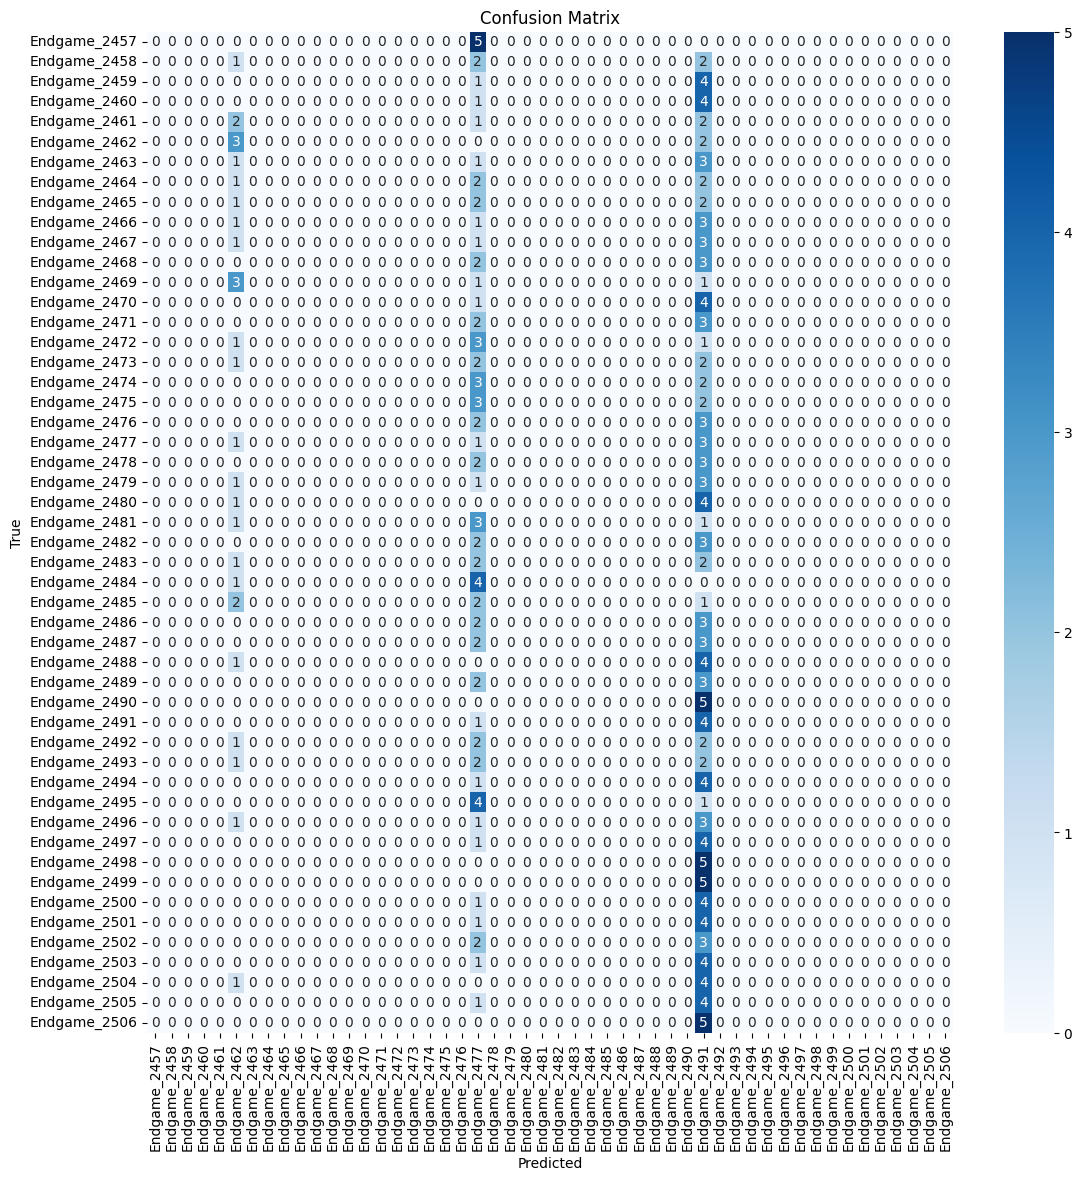

In [13]:
# 混淆矩陣
import seaborn as sns
cm = confusion_matrix(ans, pres)
df = pd.DataFrame(cm, columns=classes, index=classes)
plt.figure(figsize=(13, 13)) # cell要設置在欲呈現的圖案上
# plt.figure(figsize=(5, 5))
sns.heatmap(cm,
      annot=True,
      fmt="d",
      cmap="Blues",
      xticklabels=classes,
      yticklabels=classes
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ans, pres)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                 display_labels=classes)
disp.plot(cmap="Blues")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#@title #直接預測原圖

origin_path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/5classes/Endgame_2458/"
file_extensions = ["jpg", "jpeg", "png"]
origin_pres = []
origin_ans = []
for c in os.listdir(origin_path):
    origin_ans.append(origin_path.split("/")[-2])
    test_path = f"{origin_path}{c}"
    if c.split(".")[-1].lower() in file_extensions:
        preprocessed_image = prepare_image(test_path)
        predictions = model.predict(preprocessed_image)
        index = np.argmax(predictions)
        print("image：", c)
        print("class：", classes[index])
        origin_pres.append(classes[index])

1/1 [==============================] - 0s 40ms/step
image： 09.jpg
class： Endgame_2460
1/1 [==============================] - 0s 50ms/step
image： 11.jpg
class： Endgame_2503
1/1 [==============================] - 0s 41ms/step
image： 34.jpg
class： Endgame_2503
1/1 [==============================] - 0s 42ms/step
image： 32.jpg
class： Endgame_2503
1/1 [==============================] - 0s 44ms/step
image： 08.jpg
class： Endgame_2503
1/1 [==============================] - 0s 46ms/step
image： 30.jpg
class： Endgame_2503
1/1 [==============================] - 0s 40ms/step
image： 16.jpg
class： Endgame_2458
1/1 [==============================] - 0s 57ms/step
image： 15.jpg
class： Endgame_2503
1/1 [==============================] - 0s 65ms/step
image： 33.jpg
class： Endgame_2503
1/1 [==============================] - 0s 112ms/step
image： 20.jpg
class： Endgame_2503
1/1 [==============================] - 0s 111ms/step
image： 03.jpg
class： Endgame_2503
1/1 [==============================] - 0s 25ms/step


In [ ]:
#@title # 單圖預測
meme_path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/cropping/meme/Endgame_2457_02.jpg"

image_name = meme_path.split("/")[-1]
preprocessed_image = prepare_image(meme_path)
predictions = model.predict(preprocessed_image)
index = np.argmax(predictions)
print("image：", image_name)
print("class：", classes[index])
print("index：", index)
print(predictions)

In [ ]:
# -1~1 -> 0~255
new_array = tf.keras.utils.array_to_img(preprocessed_image[0])
new_array

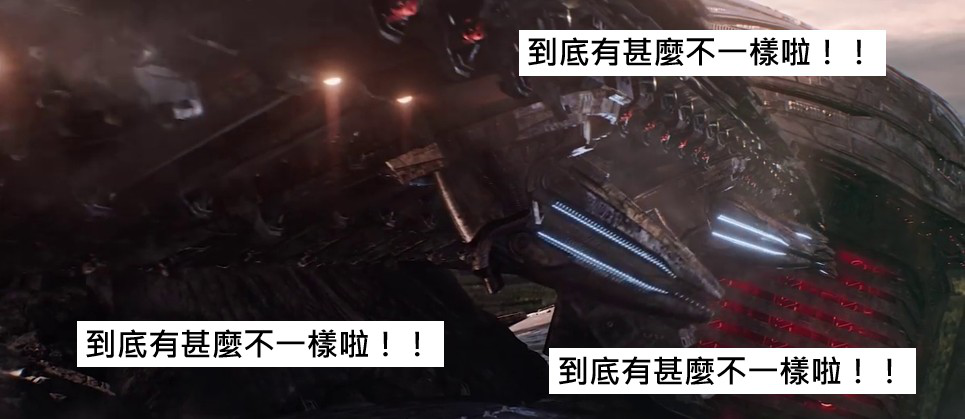

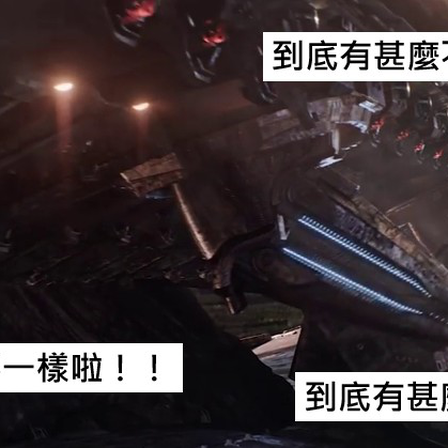

In [ ]:
# ---------- 影像裁切 ----------
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

path = "/content/drive/MyDrive/Tibame_AI_class/AI_project/EndGame_50classes/5classes_meme/EndGame_2458_01.jpg"
img = Image.open(path).convert("RGB") # 統一讀成RGB
size = (448, 448)
display(img) # 原圖
img = ImageOps.fit(img, size, Image.LANCZOS) # Image.LANCZOS 濾波器
display(img)



In [ ]:
img_array = np.asarray(img)
print(img_array.shape)


(422, 1009, 3)
